# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [13]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

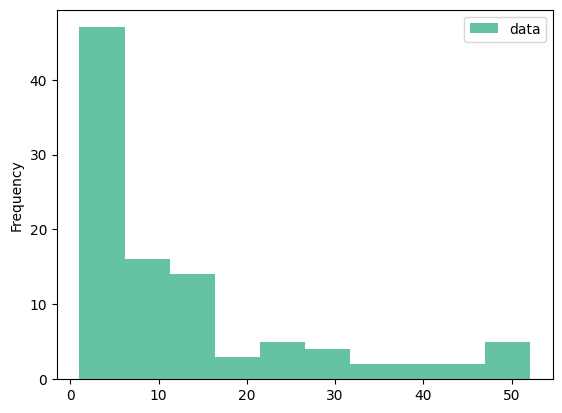

In [14]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

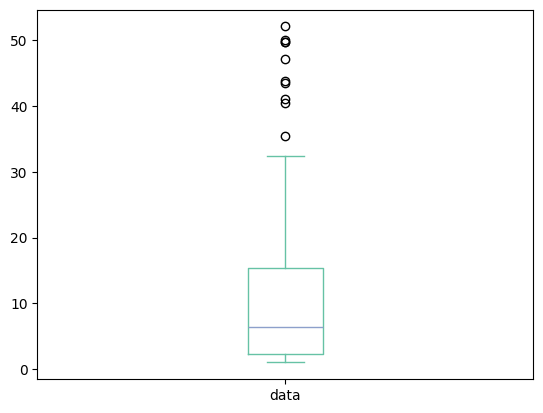

In [15]:
df.plot.box()

In [16]:
# the pros of a histogram are that it shows the overall shape/distribution and skewness . great to see visual spread of the data. 
# The cons of a histogram it does not show outliers
# the pros of a boxplot is that it clearly shows the median,outliers,and Interquartile range (IQR)
# the cons of a boxplot is that it doesnt show the full distribution of the shape and show the exact frequencies. 

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [17]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# copied and pasted the website instructions/code on how to import the dataset in Python
# Fetch dataset
statlog_heart = fetch_ucirepo(id=145)

# Data (features and targets as pandas dataframes)
X = statlog_heart.data.features
y = statlog_heart.data.targets

# I am doing this to combine features and targets(x and y) into a single DataFrame
df_statlog_heart = pd.concat([X, y], axis=1)

# Display the first few rows of the dataset
print(df_statlog_heart.head())

    age  sex  chest-pain  rest-bp  serum-chol  fasting-blood-sugar  \
0  70.0  1.0         4.0    130.0       322.0                  0.0   
1  67.0  0.0         3.0    115.0       564.0                  0.0   
2  57.0  1.0         2.0    124.0       261.0                  0.0   
3  64.0  1.0         4.0    128.0       263.0                  0.0   
4  74.0  0.0         2.0    120.0       269.0                  0.0   

   electrocardiographic  max-heart-rate  angina  oldpeak  slope  \
0                   2.0           109.0     0.0      2.4    2.0   
1                   2.0           160.0     0.0      1.6    2.0   
2                   0.0           141.0     0.0      0.3    1.0   
3                   0.0           105.0     1.0      0.2    2.0   
4                   2.0           121.0     1.0      0.2    1.0   

   major-vessels  thal  heart-disease  
0            3.0   3.0              2  
1            0.0   7.0              1  
2            0.0   7.0              2  
3            1.0

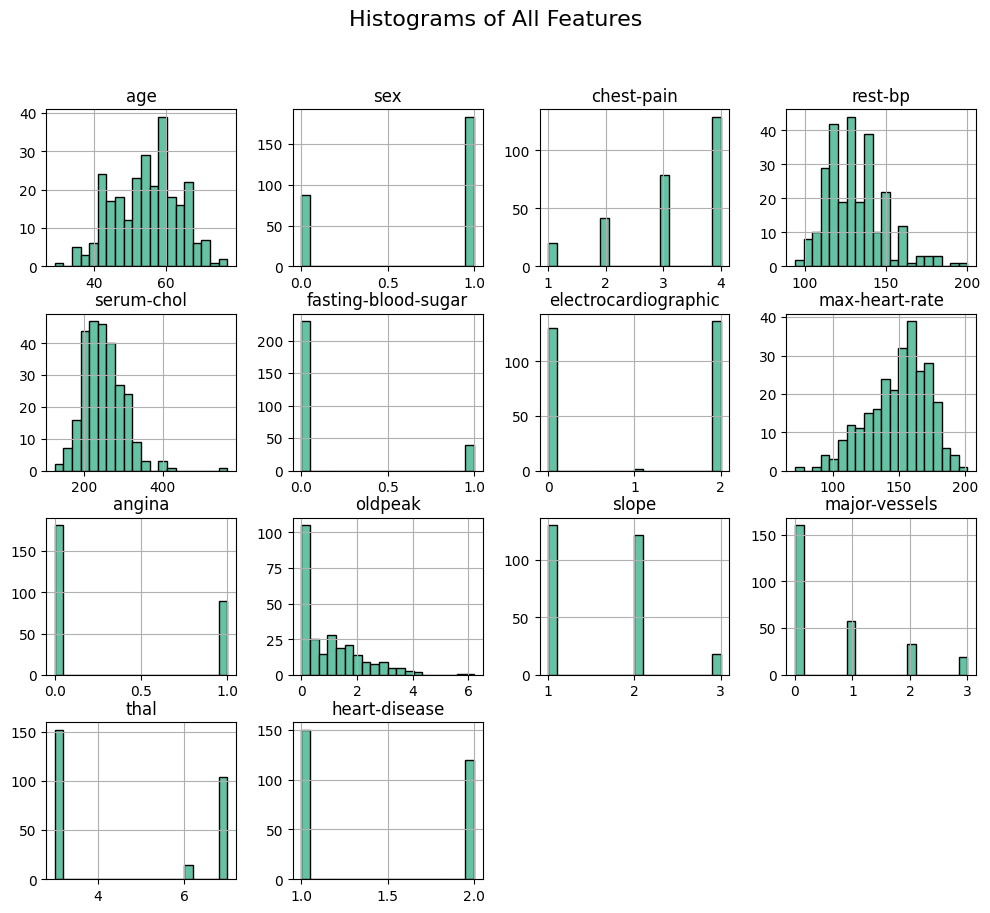

In [20]:
#Draw a histogram
import matplotlib.pyplot as plt

df_statlog_heart.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of All Features", fontsize=16)
plt.show()

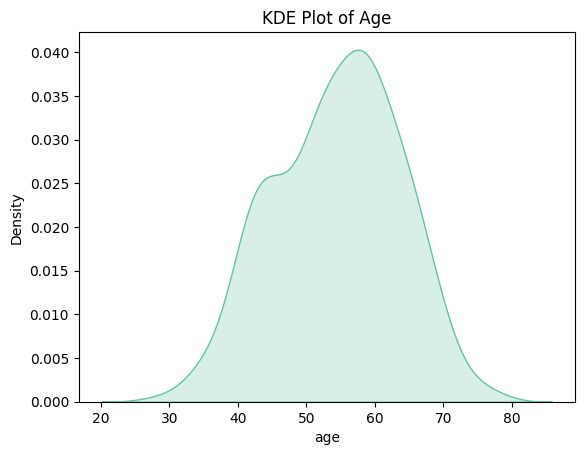

In [21]:
#KDE plot for Age
import seaborn as sns

sns.kdeplot(df_statlog_heart["age"], fill=True)
plt.title("KDE Plot of Age")
plt.show()

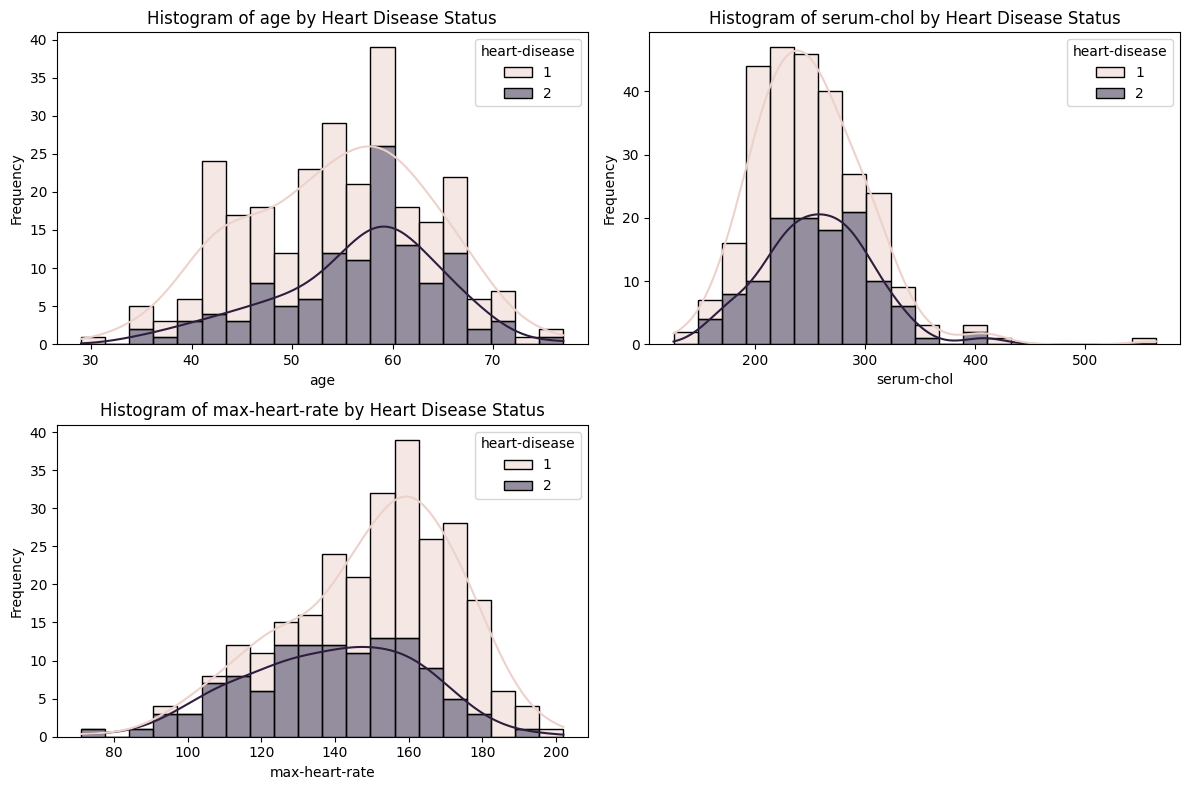

In [22]:
#grouped histogram
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns you want to plot
columns = ['age', 'serum-chol', 'max-heart-rate']

# Set the color palette for grouping
sns.set_palette("Set2")

# Plot grouped histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Creates a subplot grid (2x2 layout)
    sns.histplot(data=df_statlog_heart, x=col, hue="heart-disease", kde=True, multiple="stack", bins=20)
    plt.title(f"Histogram of {col} by Heart Disease Status")
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

/tmp/ipykernel_24699/1913651481.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_statlog_heart, x='sex', palette='Set2')


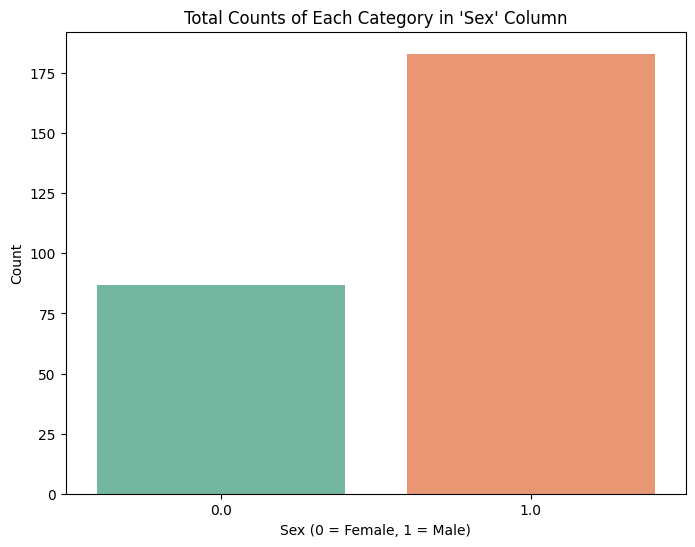

/tmp/ipykernel_24699/1913651481.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_statlog_heart, x='chest-pain', palette='Set2')


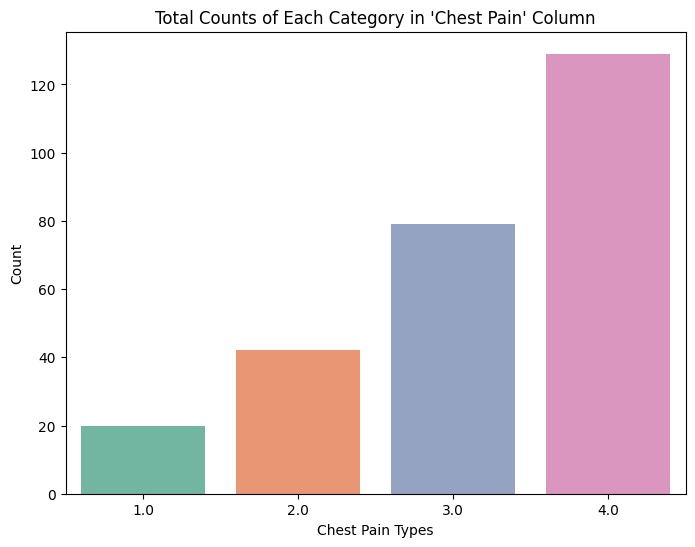

In [23]:
#drawing a bar plot to indicate total counts of each categorical variable in a given column
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the total counts of each categorical variable in the 'sex' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_statlog_heart, x='sex', palette='Set2')
plt.title("Total Counts of Each Category in 'Sex' Column")
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

# Plot the total counts of each categorical variable in the 'chest-pain' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_statlog_heart, x='chest-pain', palette='Set2')
plt.title("Total Counts of Each Category in 'Chest Pain' Column")
plt.xlabel('Chest Pain Types')
plt.ylabel('Count')
plt.show()

In [24]:
# Calculate mean, median, and mode for all numerical columns
for col in df_statlog_heart.select_dtypes(include='number').columns:
    print(f"Statistics for {col}:")
    
    # Mean
    mean_value = df_statlog_heart[col].mean()
    print(f"Mean: {mean_value}")
    
    # Median
    median_value = df_statlog_heart[col].median()
    print(f"Median: {median_value}")
    
    # Mode (since mode can have more than one value, we get the first mode)
    mode_value = df_statlog_heart[col].mode()[0]  # mode() returns a Series, take the first value
    print(f"Mode: {mode_value}")
    
    print("-" * 40)

Statistics for age:
Mean: 54.43333333333333
Median: 55.0
Mode: 54.0
----------------------------------------
Statistics for sex:
Mean: 0.6777777777777778
Median: 1.0
Mode: 1.0
----------------------------------------
Statistics for chest-pain:
Mean: 3.174074074074074
Median: 3.0
Mode: 4.0
----------------------------------------
Statistics for rest-bp:
Mean: 131.34444444444443
Median: 130.0
Mode: 120.0
----------------------------------------
Statistics for serum-chol:
Mean: 249.65925925925927
Median: 245.0
Mode: 234.0
----------------------------------------
Statistics for fasting-blood-sugar:
Mean: 0.14814814814814814
Median: 0.0
Mode: 0.0
----------------------------------------
Statistics for electrocardiographic:
Mean: 1.0222222222222221
Median: 2.0
Mode: 2.0
----------------------------------------
Statistics for max-heart-rate:
Mean: 149.67777777777778
Median: 153.5
Mode: 162.0
----------------------------------------
Statistics for angina:
Mean: 0.3296296296296296
Median: 0.0
M

In [26]:
# Calculate and display the minimum and maximum values for all numerical columns
for col in df_statlog_heart.select_dtypes(include='number').columns:
    min_value = df_statlog_heart[col].min()
    max_value = df_statlog_heart[col].max()
    print(f"Column: {col}")
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")
    print("-" * 40)

Column: age
Minimum value: 29.0
Maximum value: 77.0
----------------------------------------
Column: sex
Minimum value: 0.0
Maximum value: 1.0
----------------------------------------
Column: chest-pain
Minimum value: 1.0
Maximum value: 4.0
----------------------------------------
Column: rest-bp
Minimum value: 94.0
Maximum value: 200.0
----------------------------------------
Column: serum-chol
Minimum value: 126.0
Maximum value: 564.0
----------------------------------------
Column: fasting-blood-sugar
Minimum value: 0.0
Maximum value: 1.0
----------------------------------------
Column: electrocardiographic
Minimum value: 0.0
Maximum value: 2.0
----------------------------------------
Column: max-heart-rate
Minimum value: 71.0
Maximum value: 202.0
----------------------------------------
Column: angina
Minimum value: 0.0
Maximum value: 1.0
----------------------------------------
Column: oldpeak
Minimum value: 0.0
Maximum value: 6.2
----------------------------------------
Column: s

In [31]:
#Conclusion
# Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
#the data seems very usable and accurate, bar plot showed that males have a higher number of heart disease which is consistent to research that men are at higher risk because of their hormone changes. 
# in addition, the grouped histograms was an accurate representation that as age progresses, heart disease is more prevalent. 
#What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.? Some of the histograms are multimodal and the others are mostly symmetric.

# Are there any outliers present?  (Data points that are far from the others.)
#Yes, as seen in the box plot, there are outliers present

# If there are multiple related histograms, how does the distribution change across different groups?
#for variables such as chest pain and thal the distributions are multimodal beause they are categorical. 
# What are the minimum and maximum values represented in each histogram?
#The minimum and max values were calculated above 
# How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
#the smaller the bin size the narrower the width which leads to more detail and shows the small variations that may be misleading because it can be natural variability  but can lead to overfitting. 
# the larger the bin size the wider the width but can hide the patterns which can make the data seem more uniform than it actually is 
#adjusting the bin size can show the shape of the distribution such as it skeweness
# Does the distribution appear normal, or does it have a different distribution?
#Yes the distribution seems normal.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

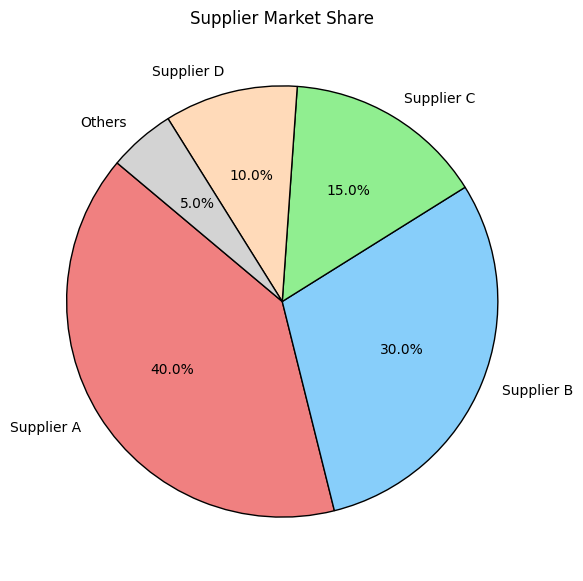

In [27]:
#I am going to recreate the pie chart on page 62
import matplotlib.pyplot as plt

# Simulating the data for suppliers' market share
suppliers = ['Supplier A', 'Supplier B', 'Supplier C', 'Supplier D', 'Others']
market_shares = [40, 30, 15, 10, 5]

# Define the color palette using color names
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'peachpuff', 'lightgray']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(market_shares, labels=suppliers, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Supplier Market Share')

# Display the chart
plt.show()